In [74]:
!pip install pandas
!pip install matplotlib
!pip install nltk
!pip install wordcloud
!pip install numpy

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
tweets_df = pd.read_csv('final_twitter.csv')
articles_df = pd.read_csv('final_news_articles.csv')

In [104]:
tweets_df.head()

,renderedContent,Month,tokens,lems,keywords,positive_keywords,negative_keywords
0,yesterday in a public meeting telanganacmo all...,0,"['yesterday', 'public', 'meeting', 'telanganac...",yesterday public meeting telanganacmo alleged ...,"['yesterday', 'public', 'meeting', 'telanganac...",[],[]
1,has this been reported on msm or are they igno...,0,"['reported', 'msm', 'ignoring', 'agriculturebi...",reported msm ignoring agriculturebill saveours...,"['reported', 'msm', 'ignoring', 'agriculturebi...",[],[ignoring]
2,such a shame i wish pmoindia as well as cmodel...,0,"['shame', 'wish', 'pmoindia', 'well', 'cmodelh...",shame wish pmoindia well cmodelhi take note tw...,"['action', 'wish', 'laws_government', 'well', ...","[well, wish]",[]
3,whitehouse realdonaldtrump forty cents of ever...,0,"['whitehouse', 'realdonaldtrump', 'forty', 'ce...",whitehouse realdonaldtrump forty cent every do...,"['whitehouse', 'realdonaldtrump', 'forty', 'ce...",[],[debt]
4,other side of apmc repeal bihar farmers want m...,0,"['side', 'apmc', 'repeal', 'bihar', 'farmers',...",side apmc repeal bihar farmer want mandis like...,"['side', 'apmc', 'laws_government', 'bihar', '...",[],[]


In [103]:
sid = SentimentIntensityAnalyzer()

def classify_sentiment(keyword_set_str):
    keyword_set = set(keyword_set_str.strip("{}").replace("'", "").split(", "))
    
    positive = []
    negative = []
    
    for word in keyword_set:
        scores = sid.polarity_scores(word)
        if scores['compound'] >= 0.1:
            positive.append(word)
        elif scores['compound'] <= -0.1:
            negative.append(word)
    
    return positive, negative

articles_df['positive_keywords'], articles_df['negative_keywords'] = zip(*articles_df['keywords'].apply(classify_sentiment))

articles_df['positive_keywords'] = articles_df['positive_keywords'].apply(list)
articles_df['negative_keywords'] = articles_df['negative_keywords'].apply(list)

tweets_df['positive_keywords'], tweets_df['negative_keywords'] = zip(*tweets_df['keywords'].apply(classify_sentiment))

tweets_df['positive_keywords'] = tweets_df['positive_keywords'].apply(list)
tweets_df['negative_keywords'] = tweets_df['negative_keywords'].apply(list)

In [27]:
def generate_word_cloud(keywords):
    text = ' '.join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [46]:
from collections import Counter
def top_30_pos(df):
    all_keywords = [keyword for sublist in df['positive_keywords'] for keyword in sublist]
    keyword_counts = Counter(all_keywords)
    top_30 = keyword_counts.most_common(30)
    
    return top_30

def top_30_neg(df):
    all_keywords = [keyword for sublist in df['negative_keywords'] for keyword in sublist]
    keyword_counts = Counter(all_keywords)
    top_30 = keyword_counts.most_common(30)
    
    return top_30

In [40]:
def clean_and_replace_keywords(keyword_list, stopwords, replacements):
    cleaned_list = [word for word in keyword_list if word not in stopwords]
    replaced_list = []
    for word in cleaned_list:
        replaced = False
        for key, values in replacements.items():
            if word == key or word in values:
                replaced_list.append(key)
                replaced = True
                break
        if not replaced:
            replaced_list.append(word)
    
    return replaced_list

In [109]:
pos_a_irrelevant_keywords = []

pos_a_similar_keywords = {
    "party": ["parties"],
    "peaceful": ["peacefully"]
}

neg_a_irrelevant_keywords = []

neg_a_similar_keywords = {
    "demand": ["demands", "demanding", "demanded"],
    "block": ["blocked"],
    "stop": ["stopped"]
}

pos_t_irrelevant_keywords = ["yes"]

pos_t_similar_keywords = {
    "party": ["parties"],
    "peaceful": ["peacefully"]
}

neg_t_irrelevant_keywords = []

neg_t_similar_keywords = {
    "terrorist": ["terrorists"],
    "killed": ["killing"],
}

In [140]:
articles_df['positive_keywords'] = articles_df['positive_keywords'].apply(
    lambda x: clean_and_replace_keywords(x, pos_a_irrelevant_keywords, pos_a_similar_keywords)
)

articles_df['negative_keywords'] = articles_df['negative_keywords'].apply(
    lambda x: clean_and_replace_keywords(x, neg_a_irrelevant_keywords, neg_a_similar_keywords)
)

In [141]:
tweets_df['positive_keywords'] = tweets_df['positive_keywords'].apply(
    lambda x: clean_and_replace_keywords(x, pos_t_irrelevant_keywords, pos_t_similar_keywords)
)

tweets_df['negative_keywords'] = tweets_df['negative_keywords'].apply(
    lambda x: clean_and_replace_keywords(x, neg_t_irrelevant_keywords, neg_t_similar_keywords)
)

In [142]:
article_pos_keywords = top_30_pos(articles_df)
for keyword, count in article_pos_keywords:
        print(f"{keyword}: {count}")

support: 288
party: 224
peaceful: 175
security: 103
legal: 96
supreme: 95
assurance: 77
reached: 77
rich: 77
help: 73
free: 73
guarantee: 72
hand: 72
agreement: 72
clear: 69
allow: 69
shared: 68
interest: 68
ensure: 64
justice: 64
better: 64
solidarity: 60
mercy: 57
freedom: 57
resolve: 56
important: 53
united: 52
ready: 51
join: 49
solution: 47


In [143]:
article_neg_keywords = top_30_neg(articles_df)
for keyword, count in article_neg_keywords:
        print(f"{keyword}: {count}")

protest: 556
demand: 241
violence: 144
stop: 112
anti: 108
block: 104
died: 72
contentious: 69
killed: 56
lost: 55
agitating: 47
broke: 47
arrested: 47
failed: 46
forced: 44
refused: 44
violent: 43
pressure: 43
conspiracy: 43
accused: 43
fight: 42
fear: 42
controversial: 41
rejected: 40
struggle: 39
injured: 39
deadlock: 38
attacked: 38
affected: 37
ill: 37


In [144]:
tweet_pos_keywords = top_30_pos(tweets_df)
for keyword, count in tweet_pos_keywords:
        print(f"{keyword}: {count}")

support: 52440
peaceful: 8508
save: 6256
well: 5889
united: 5663
truth: 5417
party: 5000
respect: 4581
help: 4555
share: 4036
true: 3997
solidarity: 3965
love: 3805
great: 3690
hope: 3595
strong: 3567
better: 3490
free: 3369
god: 3186
care: 2760
strength: 2721
freedom: 2561
best: 2392
friends: 2322
supporters: 2241
join: 2214
courage: 2184
proud: 2153
innocent: 2152
important: 2127


In [145]:
tweet_neg_keywords = top_30_neg(tweets_df)
for keyword, count in tweet_neg_keywords:
        print(f"{keyword}: {count}")

fighting: 6590
anti: 5897
protests: 5452
lost: 4365
terrorist: 4335
fake: 4246
injustice: 4080
killed: 3826
hate: 3738
violence: 3516
propaganda: 3384
arrested: 2906
poor: 2814
died: 2798
demand: 2796
wrong: 2788
hard: 2742
death: 2615
fascist: 2572
forget: 2480
agitation: 2251
bad: 2010
struggle: 1983
protesters: 1893
attack: 1886
failed: 1746
pay: 1701
lies: 1613
boycott: 1594
problem: 1500


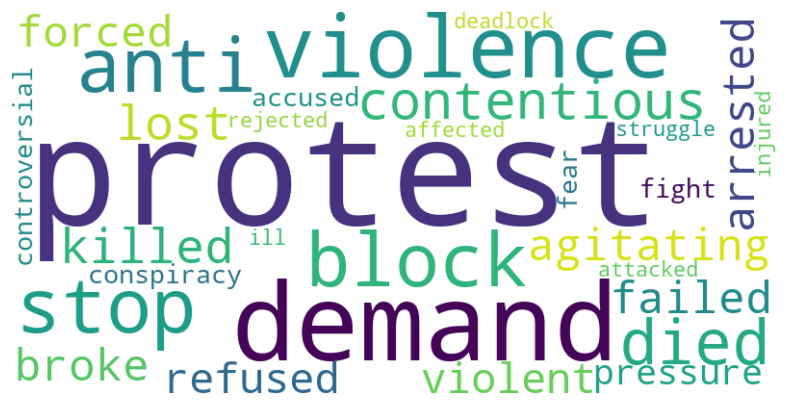

In [146]:
wordcloud_dict = {word: count for word, count in article_neg_keywords}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()    

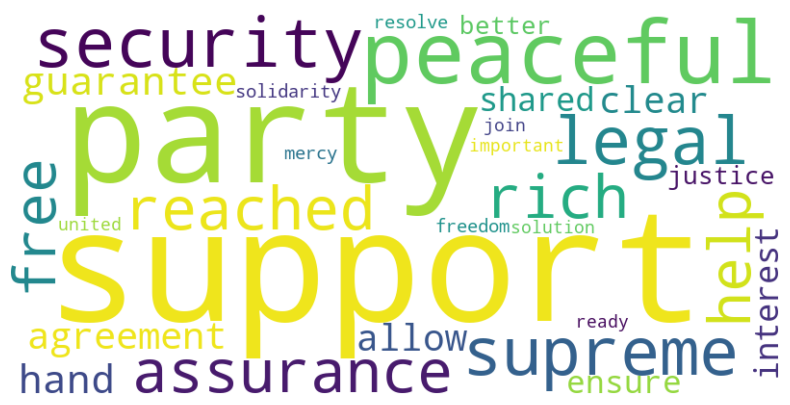

In [147]:
wordcloud_dict = {word: count for word, count in article_pos_keywords}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

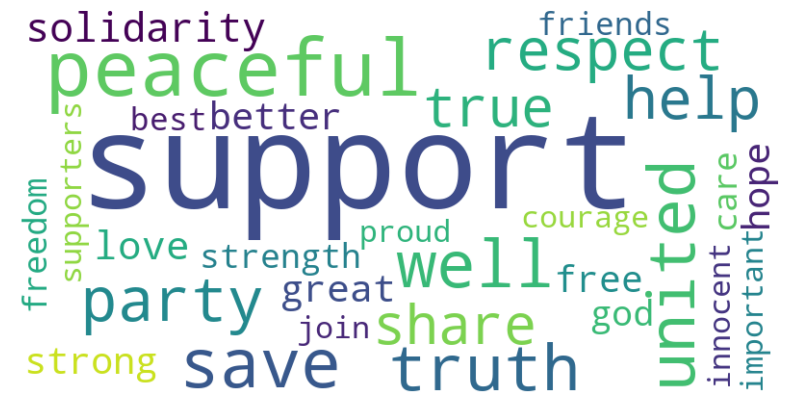

In [148]:
wordcloud_dict = {word: count for word, count in tweet_pos_keywords}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

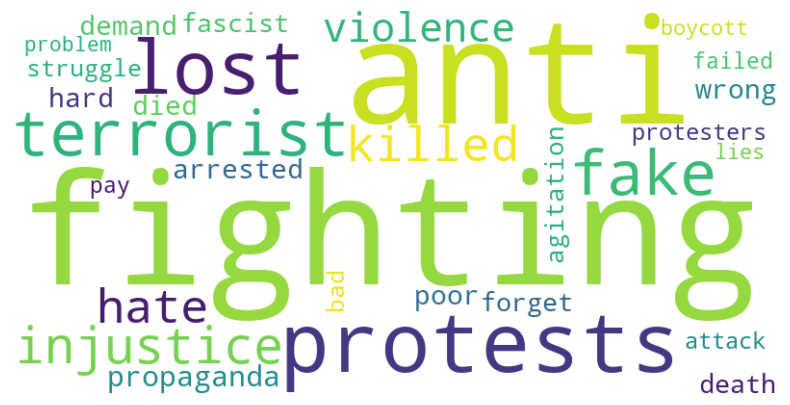

In [149]:
wordcloud_dict = {word: count for word, count in tweet_neg_keywords}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [150]:
a_p_top_keywords = [keyword[0] for keyword in article_pos_keywords]
a_n_top_keywords = [keyword[0] for keyword in article_neg_keywords]

In [151]:
t_p_top_keywords = [keyword[0] for keyword in tweet_pos_keywords]
t_n_top_keywords = [keyword[0] for keyword in tweet_neg_keywords]

Vectorization

In [80]:
!pip install scikit-learn
!pip install spacy

     ---------------------------------------- 0.0/103.4 kB ? eta -:--:--
     -------------------------------------- 103.4/103.4 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 17.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.7/12.1 MB 9.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/12.1 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.1 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/12.1 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/12.1 MB 5.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/12.1 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.1 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/12.1 MB 4.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/12.1 MB 4.7 MB/s eta 0:00:03
   ---

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [152]:
vectorizer_p_a = CountVectorizer(vocabulary=a_p_top_keywords, lowercase=False)
pa_vectors = vectorizer_p_a.fit_transform([' '.join(article) for article in articles_df['positive_keywords']])
articles_df['pos_vector'] = [list(vector.toarray()[0]) for vector in pa_vectors]

vectorizer_n_a = CountVectorizer(vocabulary=a_n_top_keywords, lowercase=False)
na_vectors = vectorizer_n_a.fit_transform([' '.join(article) for article in articles_df['negative_keywords']])
articles_df['neg_vector'] = [list(vector.toarray()[0]) for vector in na_vectors]

In [153]:
vectorizer_p_t = CountVectorizer(vocabulary=t_p_top_keywords, lowercase=False)
pt_vectors = vectorizer_p_t.fit_transform([' '.join(article) for article in tweets_df['positive_keywords']])
tweets_df['pos_vector'] = [list(vector.toarray()[0]) for vector in pt_vectors]

vectorizer_n_t = CountVectorizer(vocabulary=t_n_top_keywords, lowercase=False)
nt_vectors = vectorizer_n_t.fit_transform([' '.join(article) for article in tweets_df['negative_keywords']])
tweets_df['neg_vector'] = [list(vector.toarray()[0]) for vector in nt_vectors]

In [154]:
articles_df.head()

,Date,Title,Author,Publication Date,Article Text,Link,Source URL,Month,combined_text,tokens,lems,keywords,vector,positive_keywords,negative_keywords,pos_vector,neg_vector
0,20201101,Punjab farm protests: Railways incur loss to t...,Business Standard,2020-11-04,The loss suffered by the Railways due to the a...,https://www.business-standard.com/article/indi...,https://www.business-standard.com,0,punjab farm protests railways incur loss to th...,"['punjab', 'farm', 'protests', 'railways', 'in...",punjab farm protest railway incur loss tune r ...,"['punjab', 'agriculture', 'protest', 'railways...","[4, 3, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[vital, safety, mercy, support, grant, assurance]","[affected, demand, forced, apprehension, dange...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,20201101,Look beyond Punjab and Haryana,"Cdata, Var Template_Content, Sso_Login_Box, Xw...",2020-11-04,Written by Arindam Gupta\n\nThree Congress-rul...,https://indianexpress.com/article/opinion/farm...,https://indianexpress.com,0,look beyond punjab and haryana written by arin...,"['look', 'beyond', 'punjab', 'haryana', 'writt...",look beyond punjab haryana written arindam gup...,"['look', 'beyond', 'punjab', 'haryana', 'writt...","[7, 2, 3, 4, 4, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, ...","[value, support, hope, prominent, beneficiarie...","[suffer, lack, uncertainty, accusation, anti, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
2,20201101,"Explained: The Railways network in Punjab, and...","Avishek G Dastidar, Cdata, Var Template_Conten...",2020-11-10,The ongoing protests by farmers have brought a...,https://indianexpress.com/article/explained/th...,https://indianexpress.com,0,explained the railways network in punjab and h...,"['explained', 'railways', 'network', 'punjab',...",explained railway network punjab impacted ongo...,"['explained', 'railways', 'network', 'punjab',...","[3, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, ...","[grand, important, dedicated]","[cutting, cut, interruptions, protest, agitati...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,20201101,"‘Farm protests eating into economy, will harm ...","Raakhi Jagga, Cdata, Var Template_Content, Sso...",2020-11-12,Disgruntled notes of protest have finally star...,https://indianexpress.com/article/india/farm-p...,https://indianexpress.com,0,farm protests eating into economy will harm pu...,"['farm', 'protests', 'eating', 'economy', 'har...",farm protest eating economy harm punjab centre...,"['agriculture', 'protest', 'eating', 'economy'...","[7, 4, 3, 4, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, ...","[wisdom, clear, allow, accept, celebrate, reac...","[ruined, upset, forced, blame, doubt, losses, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,20201101,‘Modi’s Rockefeller’: Gautam Adani and the con...,"Stephanie Findlay, Hudson Lockett",2020-11-13,Print this page\n\nWhen the Indian government ...,https://www.ft.com/content/474706d6-1243-4f1e-...,https://www.ft.com,0,modi s rockefeller gautam adani and the concen...,"['modi', 'rockefeller', 'gautam', 'adani', 'co...",modi rockefeller gautam adani concentration po...,"['minister', 'rockefeller', 'gautam', 'adani',...","[5, 2, 1, 5, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, ...","[likes, creating, favoured, gained, value, sec...","[risks, outrage, shock, argue, stressed, loses...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [155]:
tweets_df.head()

,renderedContent,Month,tokens,lems,keywords,positive_keywords,negative_keywords,pos_vector,neg_vector
0,yesterday in a public meeting telanganacmo all...,0,"['yesterday', 'public', 'meeting', 'telanganac...",yesterday public meeting telanganacmo alleged ...,"['yesterday', 'public', 'meeting', 'telanganac...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,has this been reported on msm or are they igno...,0,"['reported', 'msm', 'ignoring', 'agriculturebi...",reported msm ignoring agriculturebill saveours...,"['reported', 'msm', 'ignoring', 'agriculturebi...",[],[ignoring],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,such a shame i wish pmoindia as well as cmodel...,0,"['shame', 'wish', 'pmoindia', 'well', 'cmodelh...",shame wish pmoindia well cmodelhi take note tw...,"['action', 'wish', 'laws_government', 'well', ...","[well, wish]",[],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,whitehouse realdonaldtrump forty cents of ever...,0,"['whitehouse', 'realdonaldtrump', 'forty', 'ce...",whitehouse realdonaldtrump forty cent every do...,"['whitehouse', 'realdonaldtrump', 'forty', 'ce...",[],[debt],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,other side of apmc repeal bihar farmers want m...,0,"['side', 'apmc', 'repeal', 'bihar', 'farmers',...",side apmc repeal bihar farmer want mandis like...,"['side', 'apmc', 'laws_government', 'bihar', '...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [156]:
pos_vectors_array = np.array(articles_df['pos_vector'].tolist())
pa_final_vector = np.mean(pos_vectors_array, axis=0)

neg_vectors_array = np.array(articles_df['neg_vector'].tolist())
na_final_vector = np.mean(neg_vectors_array, axis=0)

In [157]:
pos_vectors_array = np.array(tweets_df['pos_vector'].tolist())
pt_final_vector = np.mean(pos_vectors_array, axis=0)

neg_vectors_array = np.array(tweets_df['neg_vector'].tolist())
nt_final_vector = np.mean(neg_vectors_array, axis=0)

In [81]:
import spacy

In [83]:
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.4/42.8 MB 7.6 MB/s eta 0:00:06
      --------------------------------------- 0.8/42.8 MB 8.1 MB/s eta 0:00:06
      --------------------------------------- 0.9/42.8 MB 6.7 MB/s eta 0:00:07
     - -------------------------------------- 1.1/42.8 MB 6.0 MB/s eta 0:00:07
     - -------------------------------------- 1.3/42.8 MB 5.6 MB/s eta 0:00:08
     - -------------------------------------- 1.5/42.8 MB 5.3 MB/s eta 0:00:08
     - -------------------------------------- 1.7/42.8 MB 5.1 MB/s eta 0:00:09
     - -------------------------------------- 1.9/42.8 MB 4.9 MB/s eta 0:00:09
     - -------------------------------------- 2.0/42.8 MB 4.8 MB/s eta 0:00:09
     -- ------------------------------------- 2.2/42.8 MB 4.7 MB/s eta 0:00:09
     -- ------------------------------------- 2.4/42.8 MB 4.7 MB/s eta 0:00:09
     -- ------------------------------------- 2.6/42.8 MB 4

In [158]:
a_p_top_vectors = {keyword: nlp(keyword).vector for keyword in a_p_top_keywords}
a_n_top_vectors = {keyword: nlp(keyword).vector for keyword in a_n_top_keywords}

In [159]:
t_p_top_vectors = {keyword: nlp(keyword).vector for keyword in t_p_top_keywords}
t_n_top_vectors = {keyword: nlp(keyword).vector for keyword in t_n_top_keywords}

In [160]:
a_p_top_vectors_array = np.array(list(a_p_top_vectors.values()))

# Reshape pa_final_vector to a 1x30 matrix
pa_final_vector_reshaped = pa_final_vector.reshape(1, -1)

In [161]:
t_p_top_vectors_array = np.array(list(t_p_top_vectors.values()))

# Reshape pa_final_vector to a 1x30 matrix
pt_final_vector_reshaped = pt_final_vector.reshape(1, -1)

In [162]:
pa300_matrix = np.dot(pa_final_vector_reshaped, a_p_top_vectors_array)

In [163]:
pt300_matrix = np.dot(pt_final_vector_reshaped, t_p_top_vectors_array)

In [164]:
a_n_top_vectors_array = np.array(list(a_n_top_vectors.values()))

# Reshape pa_final_vector to a 1x30 matrix
na_final_vector_reshaped = na_final_vector.reshape(1, -1)

In [165]:
t_n_top_vectors_array = np.array(list(t_n_top_vectors.values()))

# Reshape pa_final_vector to a 1x30 matrix
nt_final_vector_reshaped = nt_final_vector.reshape(1, -1)

In [166]:
na300_matrix = np.dot(na_final_vector_reshaped, a_n_top_vectors_array)

In [167]:
nt300_matrix = np.dot(nt_final_vector_reshaped, t_n_top_vectors_array)

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
cosine_sim_neg = cosine_similarity(na300_matrix, nt300_matrix)
cosine_sim_neg

array([[0.91095206]])

In [169]:
cosine_sim_pos = cosine_similarity(pa300_matrix, pt300_matrix)
cosine_sim_pos

array([[0.9268533]])

co-relation in sentiment graph

In [170]:
t_as_df = pd.read_csv('t_avg_sentiments.csv')
a_as_df = pd.read_csv('n_avg_sentiments.csv')

In [171]:
t_as_df

,Month,neg,neu,pos,compound,label
0,0,0.115935,0.781305,0.102758,-0.032627,-0.042821
1,1,0.092314,0.782351,0.125346,0.062308,0.109431
2,2,0.108806,0.770184,0.121014,0.007498,0.008913
3,3,0.101269,0.740617,0.158113,0.073424,0.141798
4,4,0.102365,0.737889,0.159746,0.092606,0.163905
5,5,0.117053,0.730702,0.152248,0.041765,0.089372
6,6,0.104875,0.756582,0.138546,0.042182,0.082152
7,7,0.099356,0.749998,0.150640,0.076667,0.143562
8,8,0.107624,0.743142,0.149232,0.052968,0.104572
9,9,0.106910,0.740523,0.152570,0.061577,0.125603


In [173]:
neg_correlation = t_as_df['neg'].corr(a_as_df['neg'])
neg_correlation

0.6349314554980177

In [174]:
pos_correlation = t_as_df['pos'].corr(a_as_df['pos'])
pos_correlation

0.2339143019835889

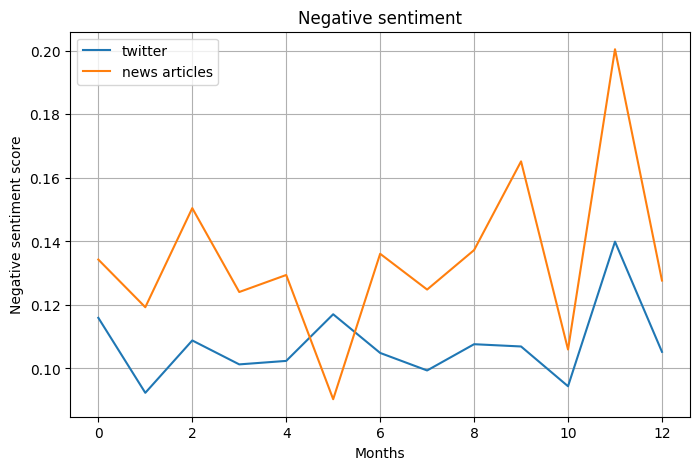

In [176]:
plt.figure(figsize=(8, 5))
plt.plot(t_as_df['Month'], t_as_df['neg'], label='twitter')
plt.plot(a_as_df['Month'], a_as_df['neg'], label='news articles')
plt.xlabel('Months')
plt.ylabel('Negative sentiment score')
plt.title('Negative sentiment')
plt.legend()
plt.grid(True)
plt.show()

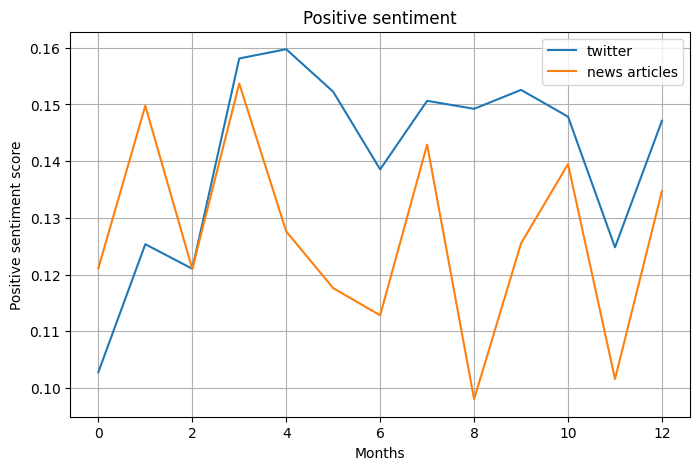

In [177]:
plt.figure(figsize=(8, 5))
plt.plot(t_as_df['Month'], t_as_df['pos'], label='twitter')
plt.plot(a_as_df['Month'], a_as_df['pos'], label='news articles')
plt.xlabel('Months')
plt.ylabel('Positive sentiment score')
plt.title('Positive sentiment')
plt.legend()
plt.grid(True)
plt.show()

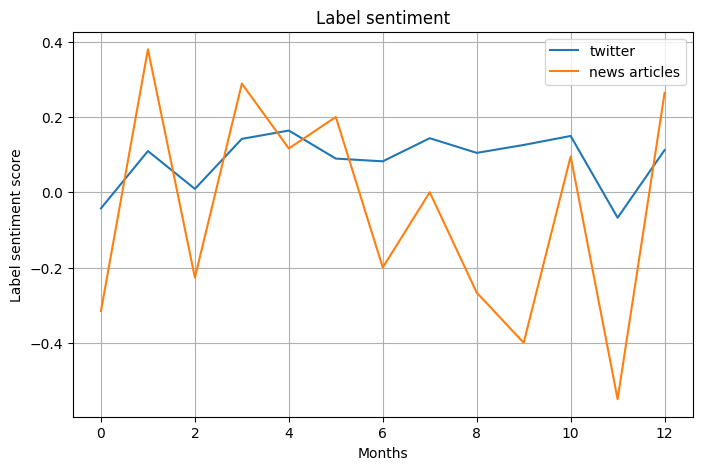

In [178]:
plt.figure(figsize=(8, 5))
plt.plot(t_as_df['Month'], t_as_df['label'], label='twitter')
plt.plot(a_as_df['Month'], a_as_df['label'], label='news articles')
plt.xlabel('Months')
plt.ylabel('Label sentiment score')
plt.title('Label sentiment')
plt.legend()
plt.grid(True)
plt.show()

In [179]:
label_correlation = t_as_df['label'].corr(a_as_df['label'])
label_correlation

0.6464743209882485